# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('/content/corpus_data_clean.pkl')
data

,transcript,full_names
anthony,thank you all for coming to the show tonight i...,Anthony Jeselnik
asir,ahir shah ends genre standup comedy social com...,Asir Shah
berner,gigglers are you ready please welcome hannah b...,Hannah Berner
cole,man that mean a lot hello los angeles how yall...,Deon Cole
devito,dating over is like thrift store shopping joe ...,Joe Devito
ellen,ellen degeneres for your approval is less a co...,Ellen DeGeneres
fortune,looking on the bright side i just wanna fee...,Fortune Feimster
hasan,san jose whats up nice to see you whats happen...,Hasan Minhaj
jamie,jamie foxx suffered a very serious medical eme...,Jamie Foxx
jeff,jeff dunhams scroogedup holiday special brings...,Jeff Dunham


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_names,polarity,subjectivity
anthony,thank you all for coming to the show tonight i...,Anthony Jeselnik,0.061381,0.541652
asir,ahir shah ends genre standup comedy social com...,Asir Shah,0.142570,0.491480
berner,gigglers are you ready please welcome hannah b...,Hannah Berner,0.033627,0.572382
cole,man that mean a lot hello los angeles how yall...,Deon Cole,0.019759,0.552647
devito,dating over is like thrift store shopping joe ...,Joe Devito,0.059537,0.439962
ellen,ellen degeneres for your approval is less a co...,Ellen DeGeneres,0.128923,0.560807
fortune,looking on the bright side i just wanna fee...,Fortune Feimster,0.096390,0.501399
hasan,san jose whats up nice to see you whats happen...,Hasan Minhaj,-0.005746,0.537566
jamie,jamie foxx suffered a very serious medical eme...,Jamie Foxx,0.069846,0.515786
jeff,jeff dunhams scroogedup holiday special brings...,Jeff Dunham,0.137667,0.534039


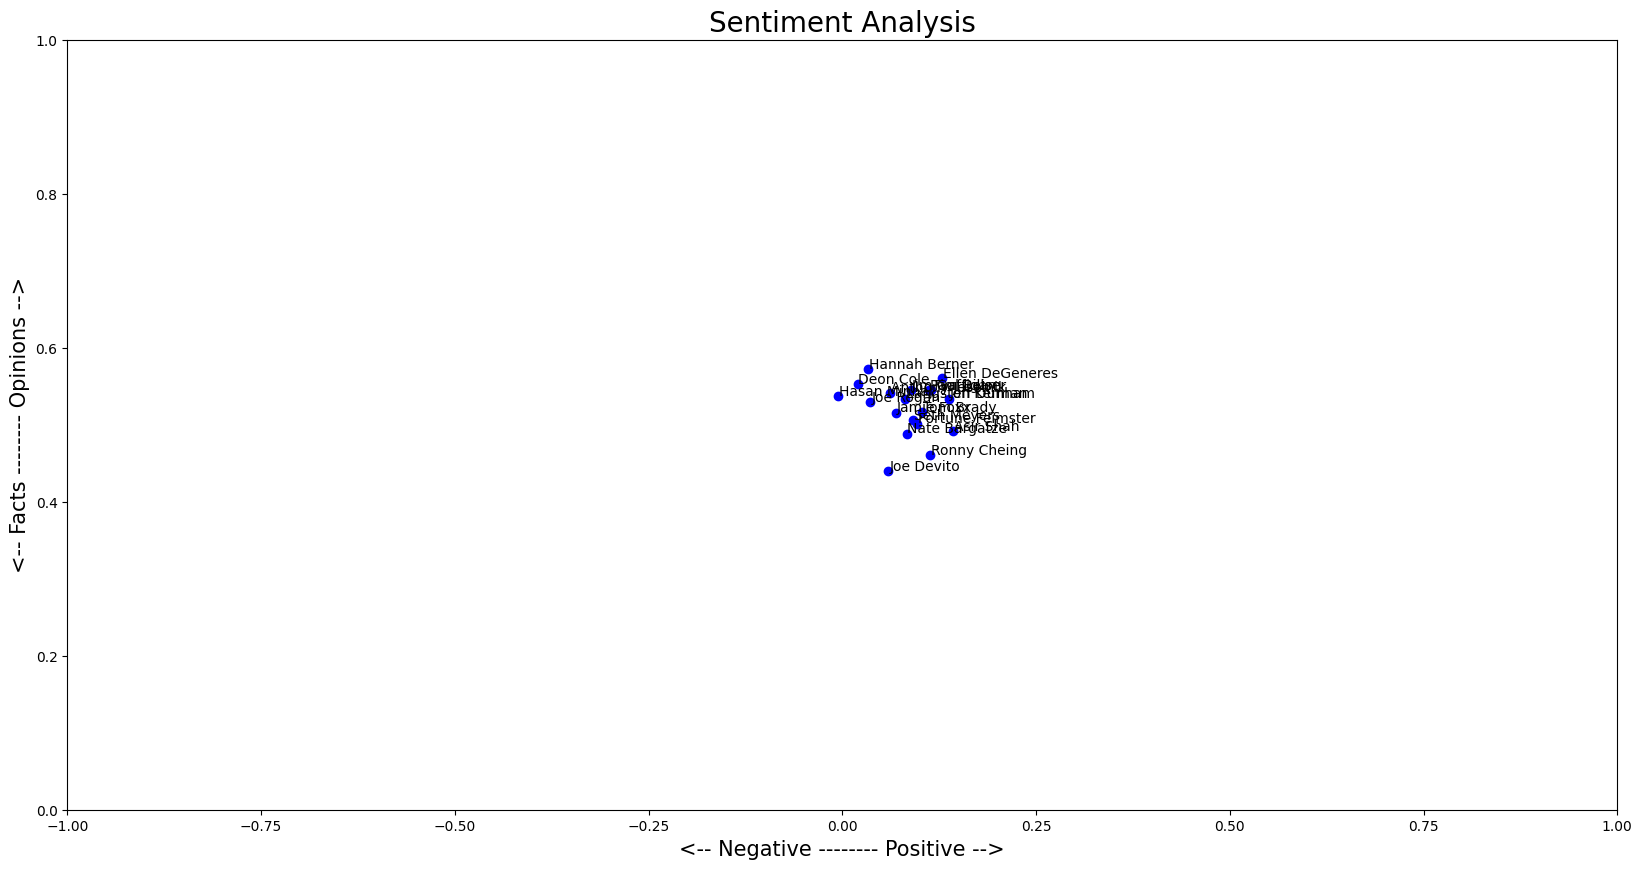

In [3]:
# # Let's plot the results
# import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [20, 10]

# for index, comedian in enumerate(data.index):
#     x = data.polarity.loc[comedian]
#     y = data.subjectivity.loc[comedian]
#     plt.scatter(x, y, color='blue')
#     plt.text(x+.001, y+.001, data['full_names'][index], fontsize=10)
#     plt.xlim(-.01, .12)

# plt.title('Sentiment Analysis', fontsize=20)
# plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
# plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

# plt.show()

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]

plt.scatter(data['polarity'], data['subjectivity'], color='blue')


for index, row in data.iterrows():
    plt.text(row['polarity'] + 0.001, row['subjectivity'] + 0.001, row['full_names'], fontsize=10)

# Set limits for better visualization
plt.xlim(-1, 1)  # -1 to 1
plt.ylim(0, 1)  # Subjectivity is always between 0 and 1


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)


plt.show()


# Everything seems to be in between the plot clustered at the centre, indicating that the generalized polarity vs subjectivity does not provide us much information about the type of content the comedians are more aligned to.
- All the comedians seem to use a mixture of both language on average when it comes to the positive or negative vibes, although being aligned towards positive statements a bit.
- In context to the subjectivity, nearly all the comedians tend to be in between, i.e., they use a mixture of both facts and opinions in their comedy.
# This doesn't help us in classifying the comedians in any perspective

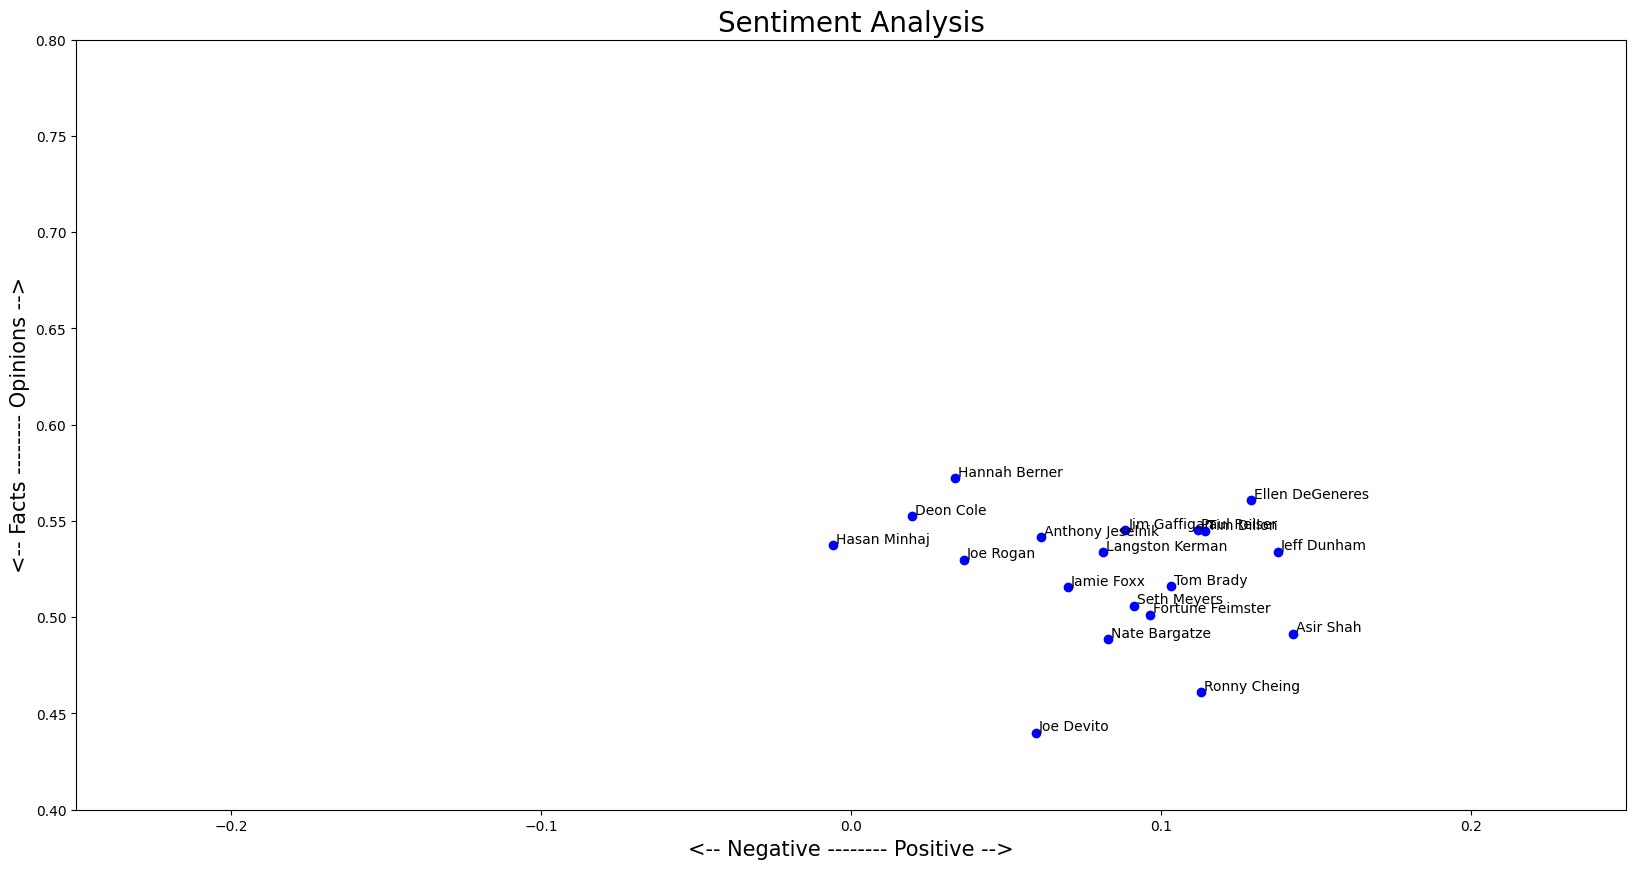

In [4]:
# changing limits to have better visualization
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]


plt.scatter(data['polarity'], data['subjectivity'], color='blue')


for index, row in data.iterrows():
    plt.text(row['polarity'] + 0.001, row['subjectivity'] + 0.001, row['full_names'], fontsize=10)


plt.xlim(-0.25, 0.25)  # Adjusted based on data range
plt.ylim(0.4, 0.8)  # Adjusted based on data range


plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()


## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

- Dividing the transcript into chunks (by sentences, words, or fixed-size segments).
- Applying sentiment analysis to each chunk separately.
- Visualizing sentiment trends over time using a line plot.

In [5]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)

    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

The code above has some disadvantages:
- the floor function might result in loss of some characters.
- the split of text characters into chunks might result in split of words and hence loss of meaning in words.

In [30]:
import numpy as np
import math

def split_text(text, n=10):
    '''Splits text into n nearly equal parts while keeping words intact.'''

    words = text.split()  # Tokenize into words
    total_words = len(words)
    size = math.ceil(total_words / n) # ensure no word loss happens even if some chunks are of different sizes

    # Create chunks by grouping words
    split_list = [' '.join(words[i:i+size]) for i in range(0, total_words, size)]

    return split_list


In [31]:
split_list = split_text(data.transcript.iloc[0], 10)
split_list

['thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago ive been doing standup comedy for years yeah thank you thank you thank you my agent said to me anthony years is a major accomplishment for any comedian you gotta celebrate pick some of your favorite cities go perform for them and i said no thank you id rather go to milwaukee but look i am excited to be here tonight ive got great news after years of standup comedy just last weekend i finally perfected my act dont get me wrong i thought it was perfect before ran into an audience member after my show last saturday who told me different last saturday night im doing a show in new york after my set im trying to get out to the car a woman from the audience chases me down practically tackles me she says anthony that last joke you told tonight your closer ive gotta tell you that joke is problematic you need to think about it and you need to change it

In [8]:
# Let's take a look at our data again
data

,transcript,full_names,polarity,subjectivity
anthony,thank you all for coming to the show tonight i...,Anthony Jeselnik,0.061381,0.541652
asir,ahir shah ends genre standup comedy social com...,Asir Shah,0.142570,0.491480
berner,gigglers are you ready please welcome hannah b...,Hannah Berner,0.033627,0.572382
cole,man that mean a lot hello los angeles how yall...,Deon Cole,0.019759,0.552647
devito,dating over is like thrift store shopping joe ...,Joe Devito,0.059537,0.439962
ellen,ellen degeneres for your approval is less a co...,Ellen DeGeneres,0.128923,0.560807
fortune,looking on the bright side i just wanna fee...,Fortune Feimster,0.096390,0.501399
hasan,san jose whats up nice to see you whats happen...,Hasan Minhaj,-0.005746,0.537566
jamie,jamie foxx suffered a very serious medical eme...,Jamie Foxx,0.069846,0.515786
jeff,jeff dunhams scroogedup holiday special brings...,Jeff Dunham,0.137667,0.534039


In [32]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago ive been doing standup comedy for years yeah thank you thank you thank you my agent said to me anthony years is a major accomplishment for any comedian you gotta celebrate pick some of your favorite cities go perform for them and i said no thank you id rather go to milwaukee but look i am excited to be here tonight ive got great news after years of standup comedy just last weekend i finally perfected my act dont get me wrong i thought it was perfect before ran into an audience member after my show last saturday who told me different last saturday night im doing a show in new york after my set im trying to get out to the car a woman from the audience chases me down practically tackles me she says anthony that last joke you told tonight your closer ive gotta tell you that joke is problematic you need to think about it and you need to change i

In [10]:
len(list_pieces)

19

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.18795905483405484,
  0.032072829131652644,
  0.09587820715869497,
  0.027139658035884456,
  0.0982489994282447,
  0.09726890756302518,
  0.062378547378547394,
  -0.06664653176281084,
  0.034968666254380554,
  0.045804765804765814],
 [0.16111760461760471,
  0.1341960382072323,
  0.053673783843275355,
  0.1397254532906707,
  0.11825689223057648,
  0.17427237002479723,
  0.1572080831355025,
  0.08328669612174765,
  0.16704927248677243,
  0.2563322937516486],
 [-0.09270282186948854,
  0.06592857142857142,
  0.0040344171195234955,
  0.13606150793650795,
  -0.015351382488479252,
  0.15,
  -0.035083333333333314,
  0.07658316798941801,
  -0.012513227513227521,
  0.0835586798822093],
 [-0.07528336443430782,
  -0.06407420585502778,
  0.05788978494623653,
  0.05398833573833574,
  0.07055171530977981,
  -0.03075661375661375,
  0.2152141359688529,
  -0.009760512392091336,
  -0.0713333333333333,
  0.08121069182389933],
 [6.478781988985935e-05,
  0.1354423868312757,
  -0.05619369369369369,
  0.08

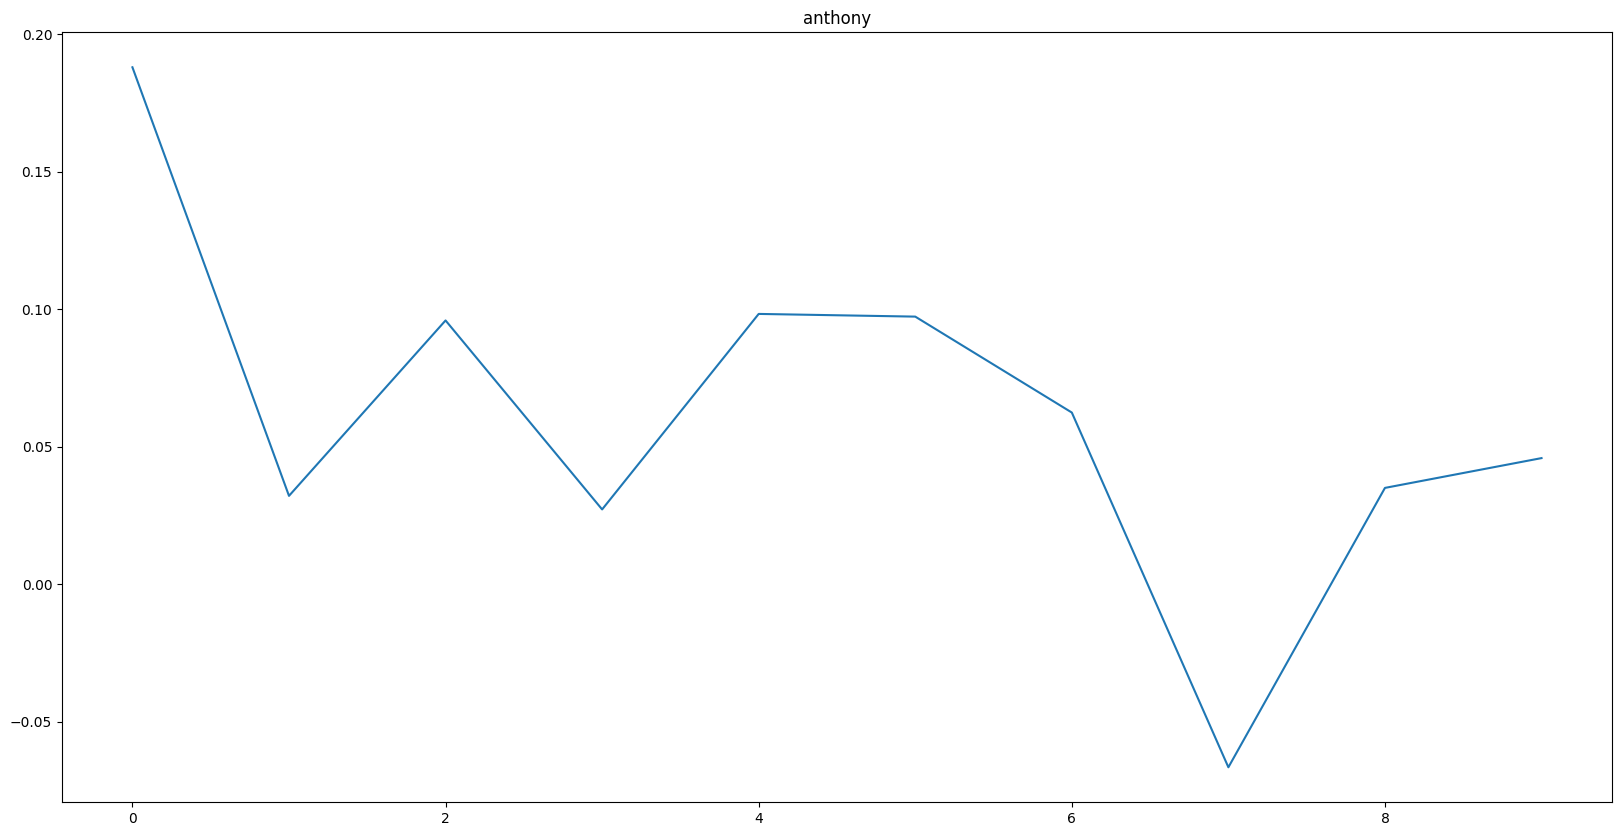

In [14]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_names'].index[0])
plt.show()

<ipython-input-19-4d98626fd1ec>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][index])


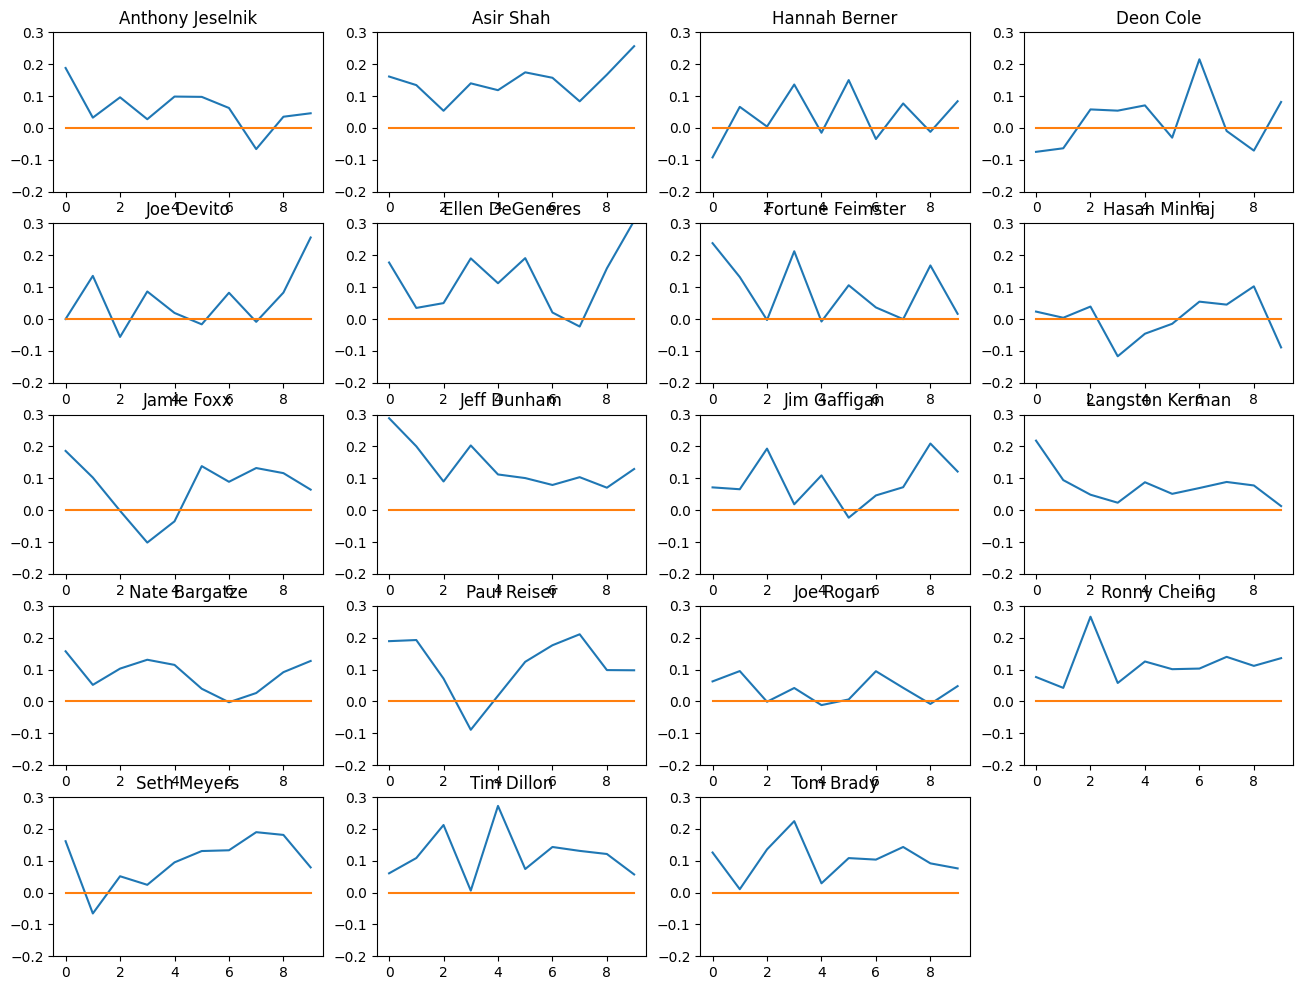

In [19]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_names'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

- Comedians like Anthony, Langston and Jeff start on a positive note and then end up with a bunch of negative statements in the end and hence their graph depriciates with time.
- Comedians like Asir, Joe and Ronny have a incremental graph, indicating the increase in their use of positive statements in their comedy as the time passes.
- Comedians like Jamie, Paul and Hassan seem to be a bit extremist in their statements sinces their sentiment changes with a very high extent over a small amount of time.
- rest of the comedians have their senitments varied across time at almost regular intervals indicating that their comedy is not dependent on any specific polarity.

In [34]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.5196667568542569,
  0.5501283846872081,
  0.48839483687044666,
  0.5451557352500748,
  0.5262687522121485,
  0.5682812013694365,
  0.5171340439395995,
  0.6376103224940433,
  0.49537703566275004,
  0.5611020436020436],
 [0.4747978354978354,
  0.5255210688979345,
  0.4169220962653166,
  0.5436545893719804,
  0.507689223057644,
  0.519410306521957,
  0.4614780679296808,
  0.46872361315660294,
  0.49821726190476184,
  0.4880003180809632],
 [0.6350440917107584,
  0.5124285714285716,
  0.5734367996070122,
  0.5725829725829726,
  0.6234447004608296,
  0.5730820105820105,
  0.5835238095238094,
  0.5282903439153439,
  0.5617592592592593,
  0.5550581771170008],
 [0.5218588015757828,
  0.49218011820751545,
  0.5463440860215053,
  0.48418951418951384,
  0.622007808499744,
  0.5363915343915345,
  0.5287361485474695,
  0.5605854915065444,
  0.6677777777777781,
  0.6002171308775084],
 [0.4366456106252023,
  0.5489711934156379,
  0.45420420420420426,
  0.4208243145743145,
  0.3712797619047619,
  

<ipython-input-35-635b0dcb7de0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][index])


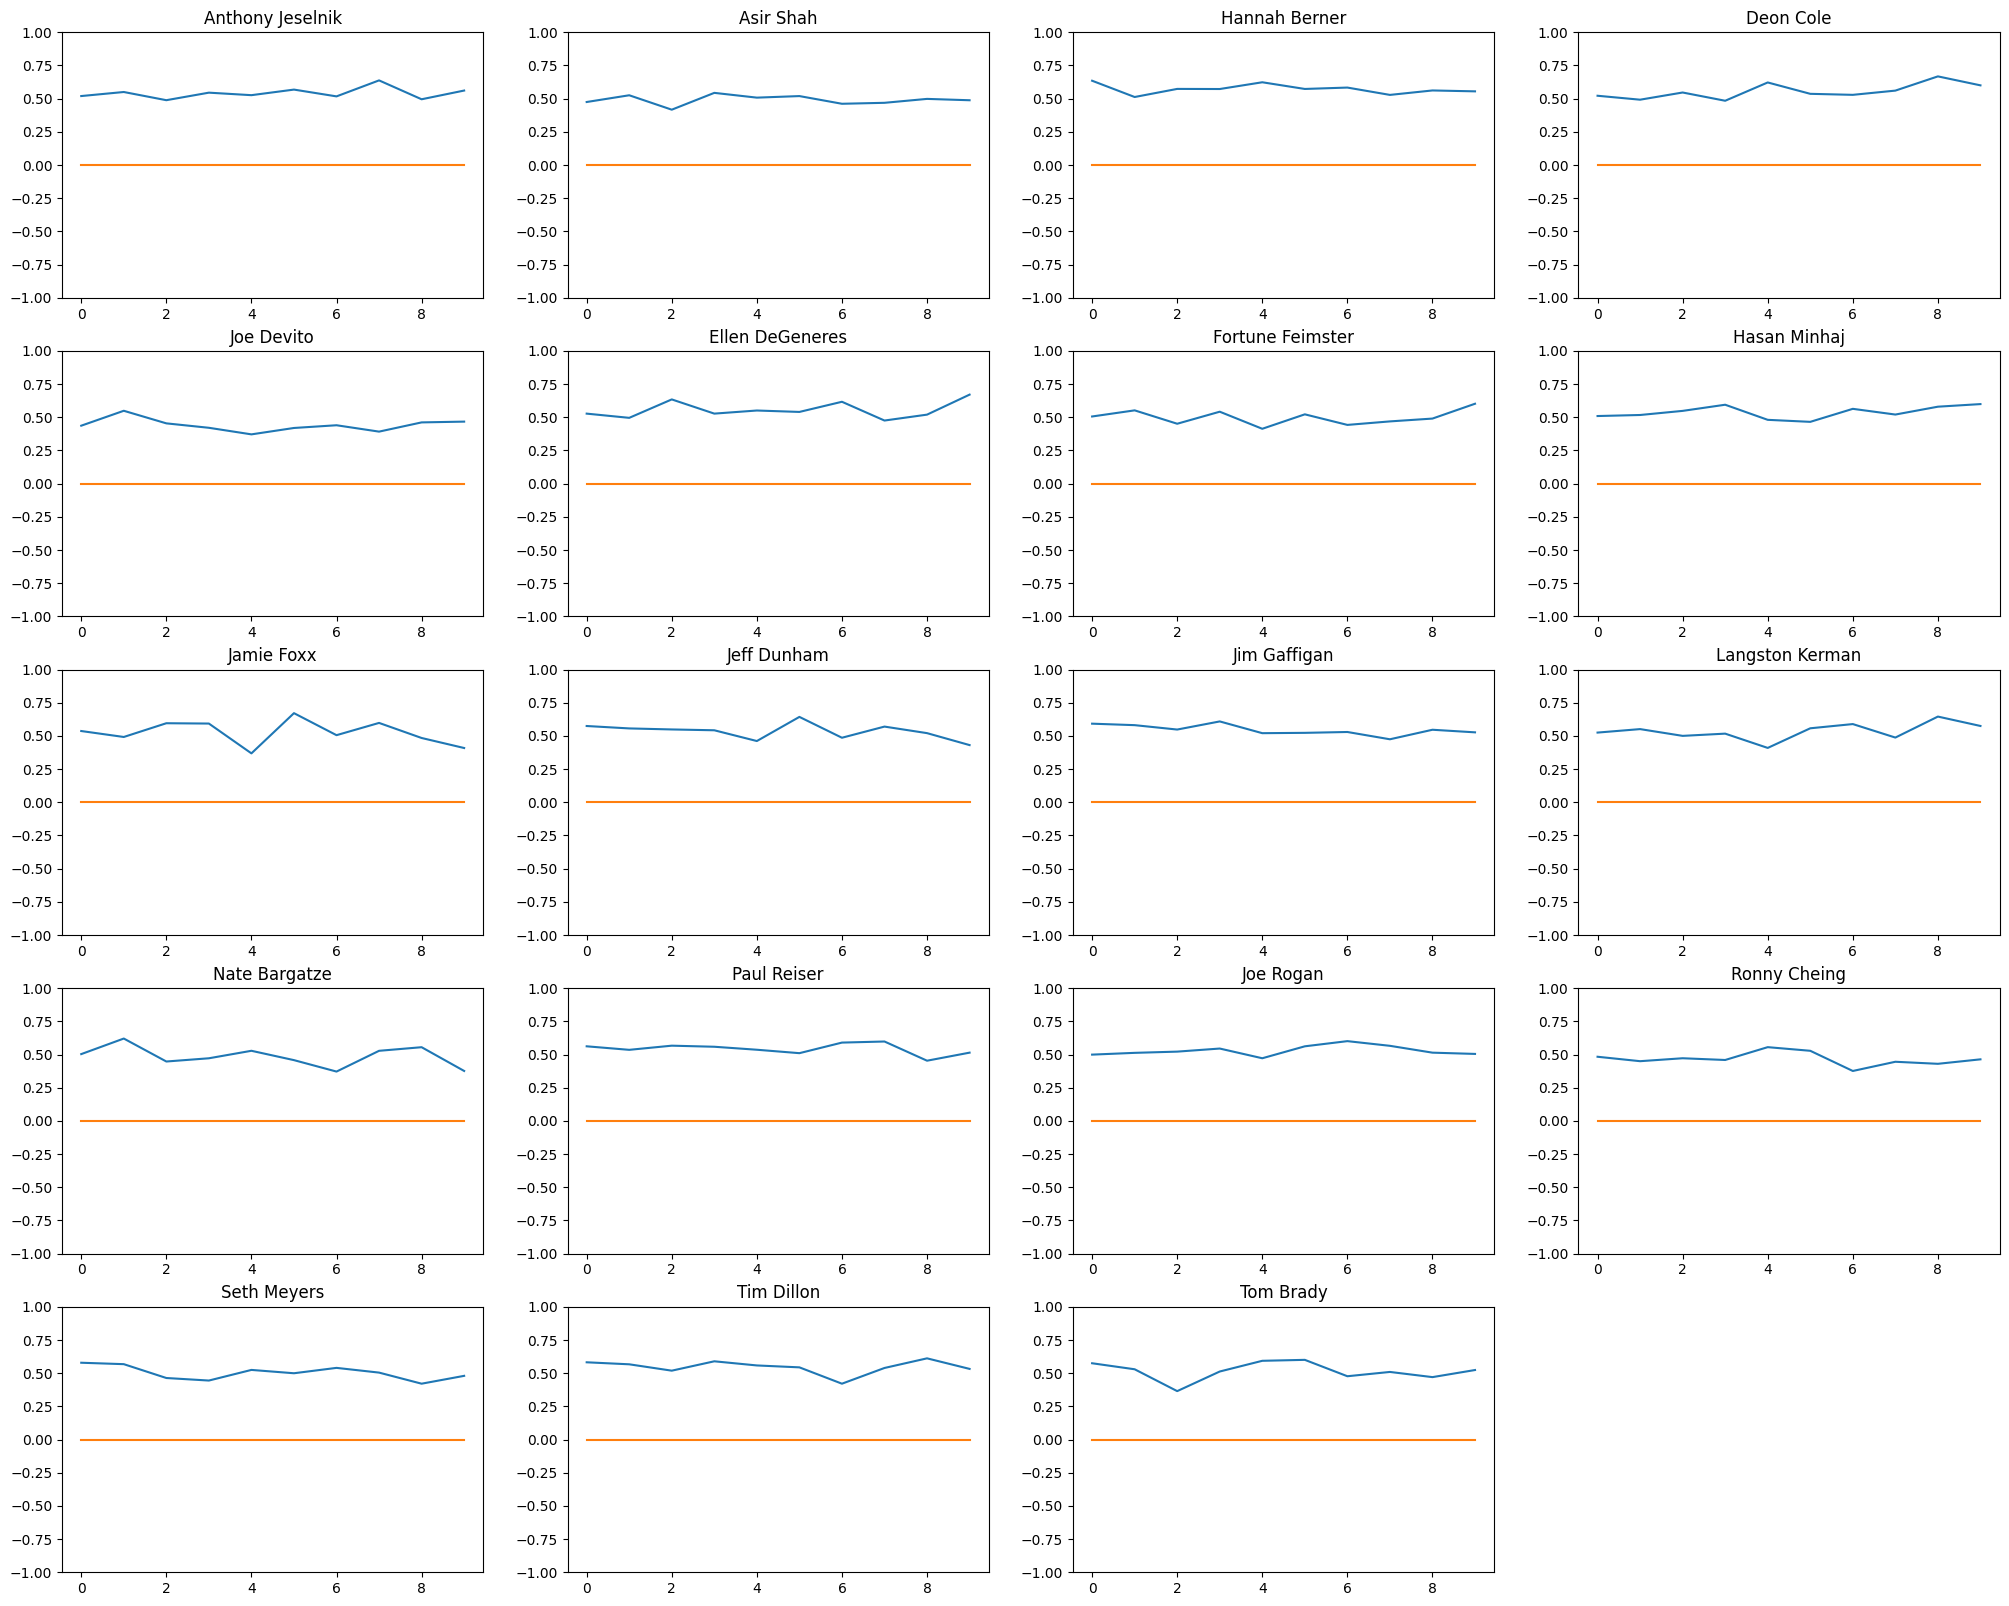

In [35]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [25, 20]

for index, comedian in enumerate(data.index):
    plt.subplot(5, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_names'][index])
    plt.ylim(ymin=-1, ymax=1)

plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [55]:
import numpy as np
import math

def split_text(text, n=17):
    '''Splits text into n nearly equal parts while keeping words intact.'''

    words = text.split()  # Tokenize into words
    total_words = len(words)
    size = math.ceil(total_words / n) # ensure no word loss happens even if some chunks are of different sizes

    # Create chunks by grouping words
    split_list = [' '.join(words[i:i+size]) for i in range(0, total_words, size)]

    return split_list


In [56]:
split_list = split_text(data.transcript.iloc[0], 10)
split_list

['thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago ive been doing standup comedy for years yeah thank you thank you thank you my agent said to me anthony years is a major accomplishment for any comedian you gotta celebrate pick some of your favorite cities go perform for them and i said no thank you id rather go to milwaukee but look i am excited to be here tonight ive got great news after years of standup comedy just last weekend i finally perfected my act dont get me wrong i thought it was perfect before ran into an audience member after my show last saturday who told me different last saturday night im doing a show in new york after my set im trying to get out to the car a woman from the audience chases me down practically tackles me she says anthony that last joke you told tonight your closer ive gotta tell you that joke is problematic you need to think about it and you need to change it

In [57]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)

list_pieces

[['thank you all for coming to the show tonight i do appreciate it in case you guys dont know why im on tour right now as of a couple of months ago ive been doing standup comedy for years yeah thank you thank you thank you my agent said to me anthony years is a major accomplishment for any comedian you gotta celebrate pick some of your favorite cities go perform for them and i said no thank you id rather go to milwaukee but look i am excited to be here tonight ive got great news after years of standup comedy just last weekend i finally perfected my act dont get me wrong i thought it was perfect before ran into an audience member after my show last saturday who told me different last saturday night im doing a show in new york after my set im trying to get out to the car a woman from the audience chases me down practically tackles me she says anthony that last joke you told tonight your closer ive gotta tell you that joke is problematic you need to think about it and you need to change i

In [58]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)

polarity_transcript

[[0.1913050144300144,
  0.09458525345622122,
  0.06588541666666665,
  0.10695153061224487,
  0.04467703349282296,
  -0.01695660306771418,
  0.04218129960317462,
  0.0964879206814691,
  0.21207264957264954,
  -0.056904761904761895,
  0.08778787878787878,
  0.08353555967841683,
  -0.11330447330447332,
  0.014682539682539672,
  0.037601410934744256,
  0.04258903974813066,
  0.044778060104147074],
 [0.24870601620601626,
  0.044641203703703704,
  0.15515089807852975,
  0.14503432282003711,
  0.0268484555984556,
  0.057007193143556775,
  0.1948247354497355,
  0.15673894557823131,
  0.10653393541324575,
  0.19333355880230874,
  0.15959783141386913,
  0.14204285714285714,
  0.09794695071010859,
  0.06677050264550265,
  0.21772572665429799,
  0.14723174603174605,
  0.2916525914886571],
 [-0.10829912424740011,
  -0.008806022408963596,
  0.10604636591478697,
  0.08311688311688312,
  -0.03241916519694299,
  0.09542942176870749,
  0.02322845804988662,
  0.09396718146718148,
  0.07049319727891154,
 

<ipython-input-59-4d98626fd1ec>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][index])


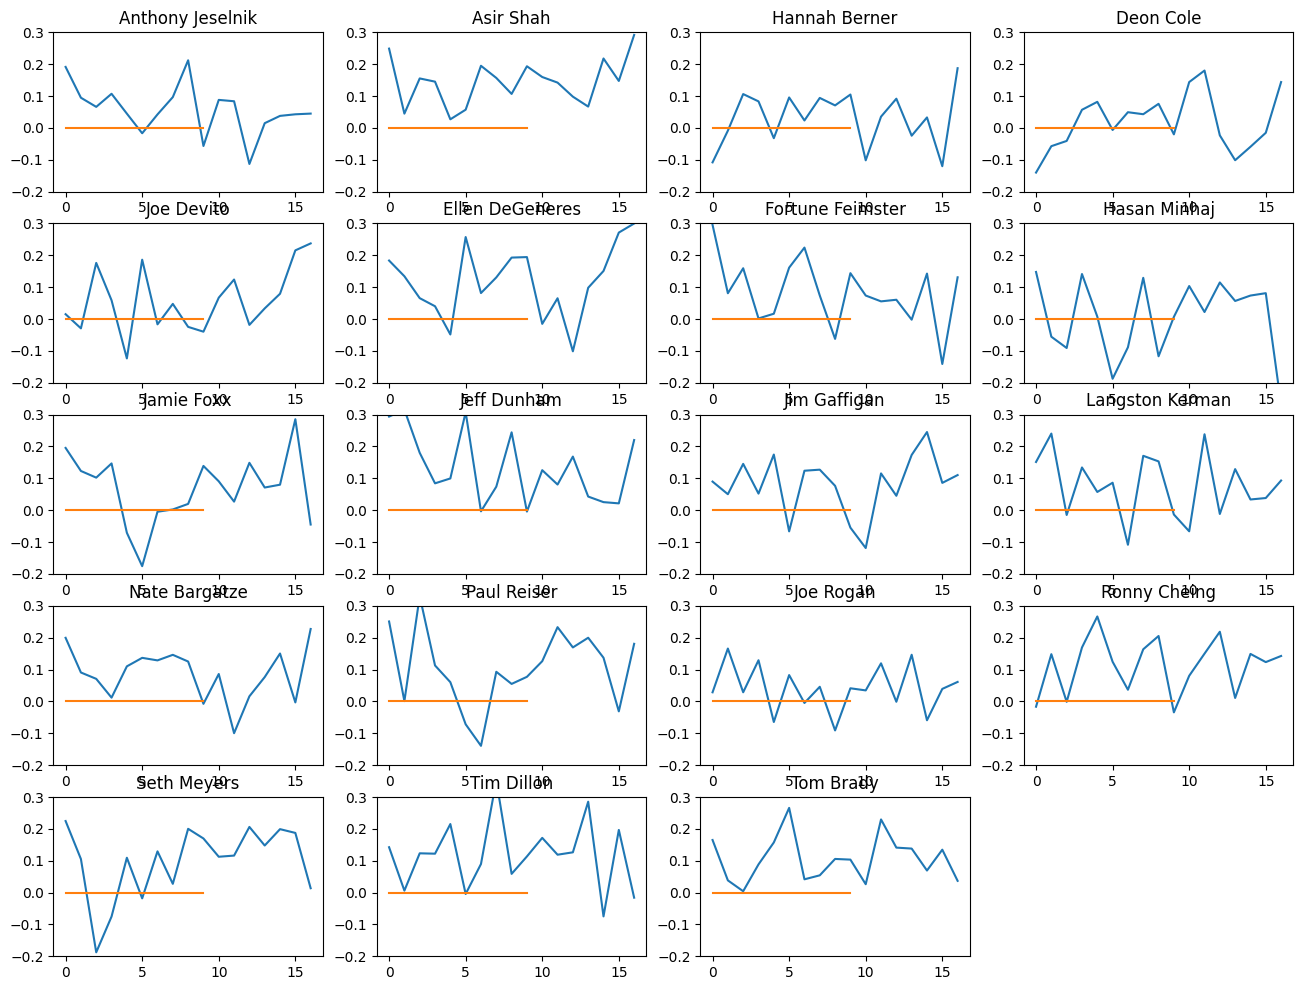

In [59]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_names'][index])
    plt.ylim(ymin=-.2, ymax=.3)

plt.show()

In [60]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)

subjectivity_transcript

[[0.5351370851370852,
  0.5389400921658987,
  0.5221354166666667,
  0.510671768707483,
  0.5039673046251995,
  0.5792181069958848,
  0.4945932539682539,
  0.49982660708467164,
  0.5844932844932844,
  0.5948174603174603,
  0.5179658119658119,
  0.5109042465471038,
  0.6487229437229438,
  0.5452380952380953,
  0.4971075837742504,
  0.516710940574577,
  0.5826113620678838],
 [0.4880590243090242,
  0.49683256172839485,
  0.53515820802005,
  0.4080839517625231,
  0.4612500000000001,
  0.4294799182299182,
  0.632005070546737,
  0.5019515306122447,
  0.46517709780640815,
  0.5476888302669551,
  0.44943845462713383,
  0.48675396825396816,
  0.5350793650793652,
  0.41149074074074066,
  0.517725726654298,
  0.44928730158730157,
  0.5034579400563008],
 [0.6896414887794198,
  0.5327380952380952,
  0.4492481203007519,
  0.5787229437229439,
  0.5871898883009996,
  0.6008503401360547,
  0.4843820861678004,
  0.6324324324324324,
  0.6121598639455783,
  0.5830309901738473,
  0.6712643678160919,
  0.522

<ipython-input-61-635b0dcb7de0>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][index])


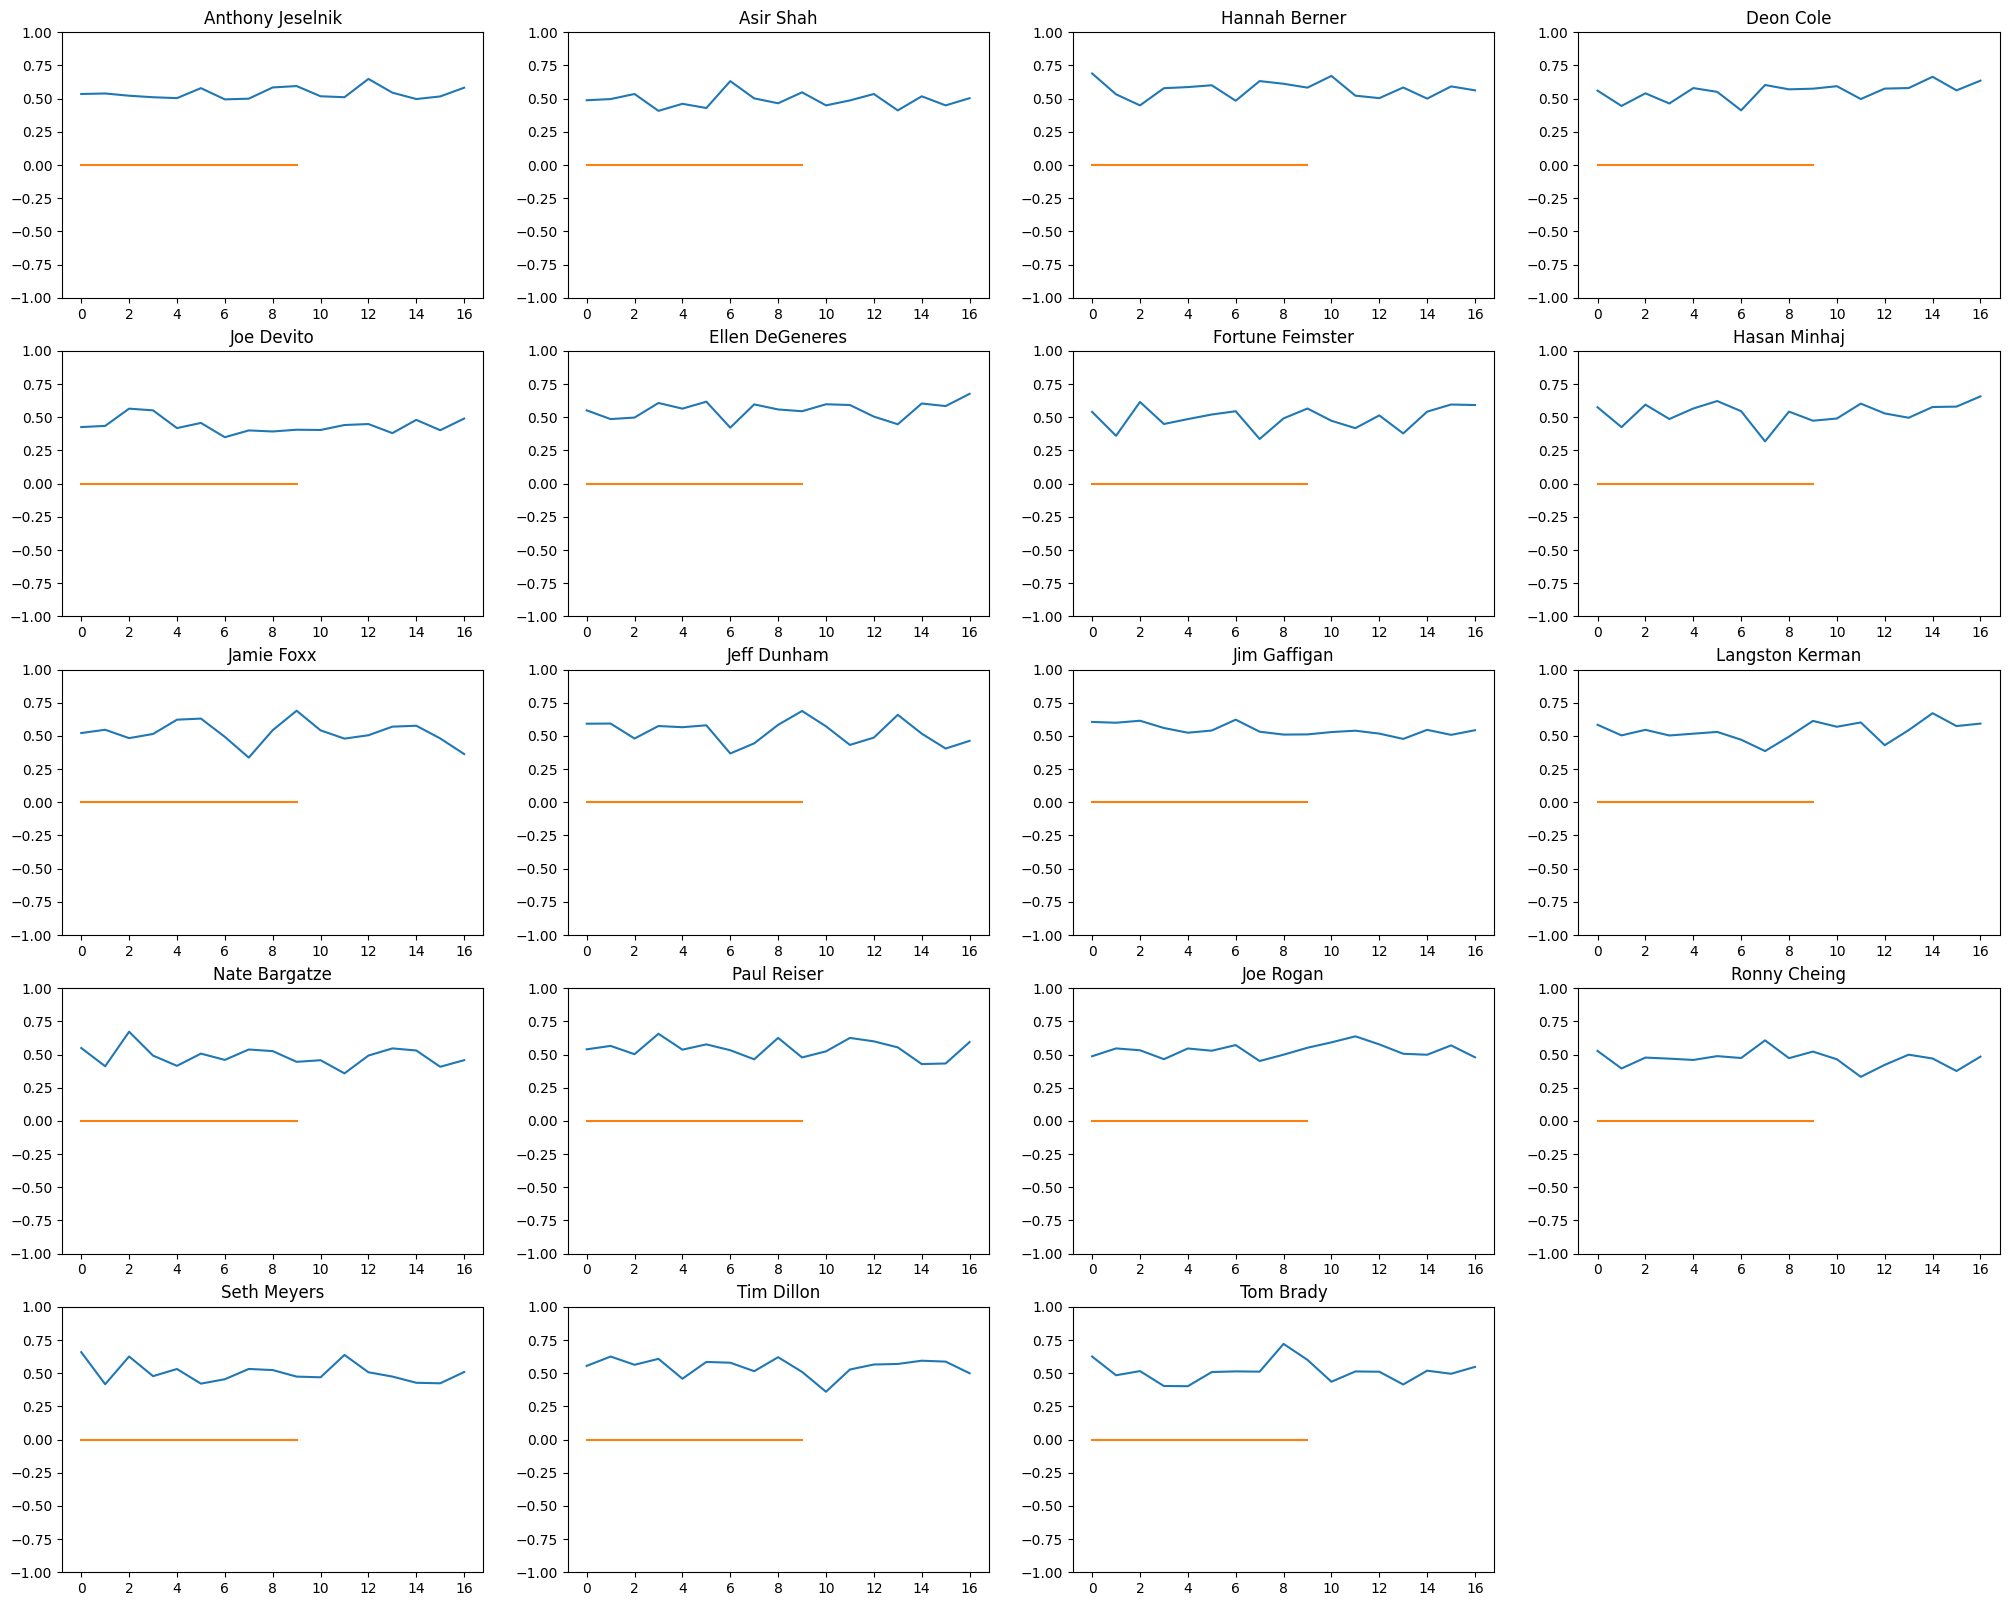

In [61]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [25, 20]

for index, comedian in enumerate(data.index):
    plt.subplot(5, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_names'][index])
    plt.ylim(ymin=-1, ymax=1)

plt.show()

Let's take three comedians in the analysis that have the same fluctuating pattern according to the 10 chunk split and check in the more detailed split if they are actually similar in detail.
For example let's take Jamie, Paul and Hasan

<ipython-input-62-6612c29d818a>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][idx])


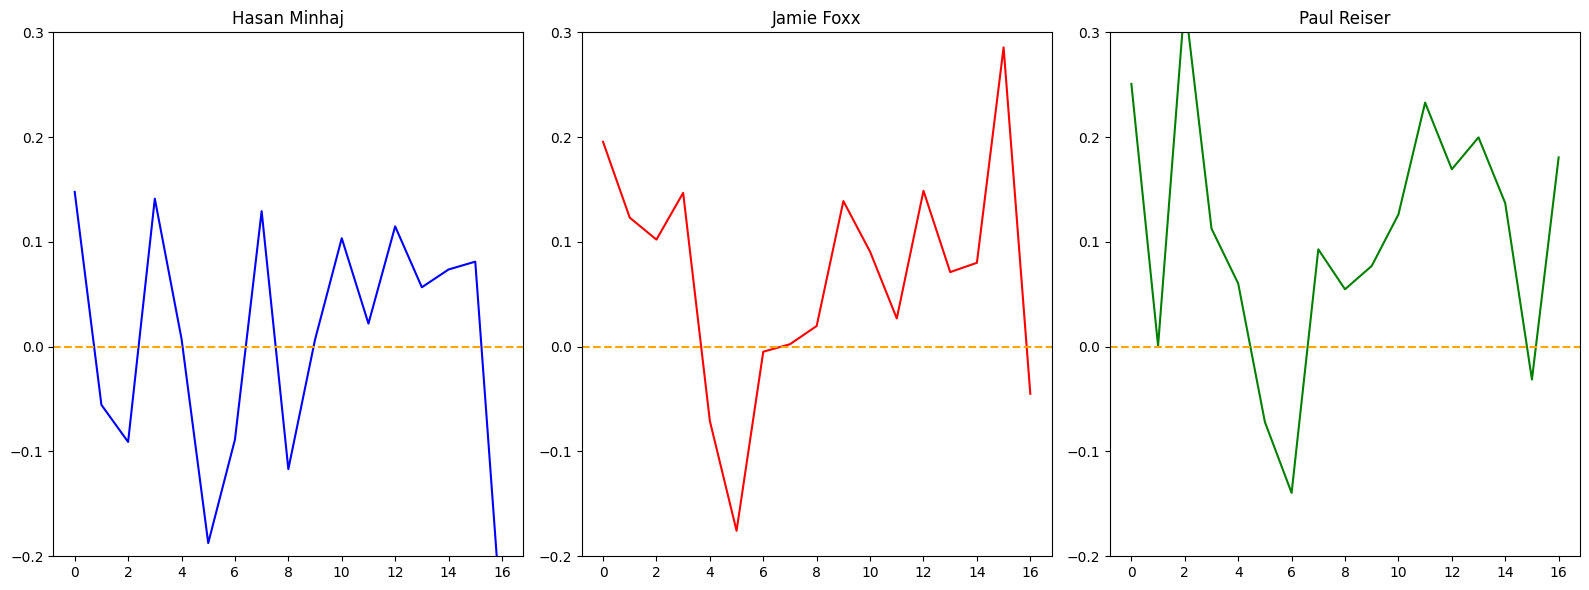

<ipython-input-62-6612c29d818a>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(polarity_transcript[idx], color=colors[i], label=data['full_names'][idx])


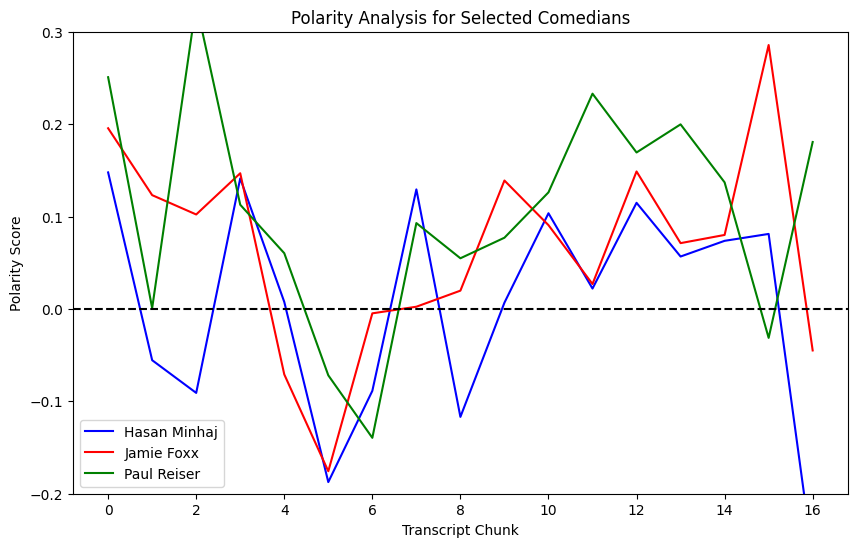

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Select the specific comedians (Python uses zero-based indexing, so 9th → index 8, 14th → index 13, 17th → index 16)
selected_indices = [7, 8, 13]
colors = ['blue', 'red', 'green']  # Different colors for each comedian

plt.figure(figsize=(16, 6))

# Plot individual graphs
for i, idx in enumerate(selected_indices):
    plt.subplot(1, 3, i + 1)
    plt.plot(polarity_transcript[idx], color=colors[i])
    plt.axhline(0, color='orange', linestyle='--')  # Baseline at y=0
    plt.title(data['full_names'][idx])
    plt.ylim(-0.2, 0.3)

plt.tight_layout()
plt.show()

# Combined graph for all 3 comedians
plt.figure(figsize=(10, 6))
for i, idx in enumerate(selected_indices):
    plt.plot(polarity_transcript[idx], color=colors[i], label=data['full_names'][idx])

plt.axhline(0, color='black', linestyle='--')  # Baseline at y=0
plt.legend()
plt.title("Polarity Analysis for Selected Comedians")
plt.ylim(-0.2, 0.3)
plt.xlabel("Transcript Chunk")
plt.ylabel("Polarity Score")
plt.show()


While the comedians looked similar from broader perspective, here are some useful insights:

- While the major down peak is same for all, Paul tends to be on the opposite sentiment as compared to the two comedians through the timeline, making him different from the two.
- Although Jamie and Hasan have the same average sentiment over the time, Hasan tends to prefer an extreme approach and gets aligned to a single emotion at a time while Jamie tries to maintain a neutral mix, showing Jamie is more stable than the other two.
- These insights could not have been observed from the 10 chunk data that precisely.

- Paul's Sentiment Opposes the Others
- Hasan's Extreme Emotional Swings vs. Jamie's Stability
- Finer Analysis Brings Out Subtle Differences

<ipython-input-66-1920d165fd60>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_names'][idx])


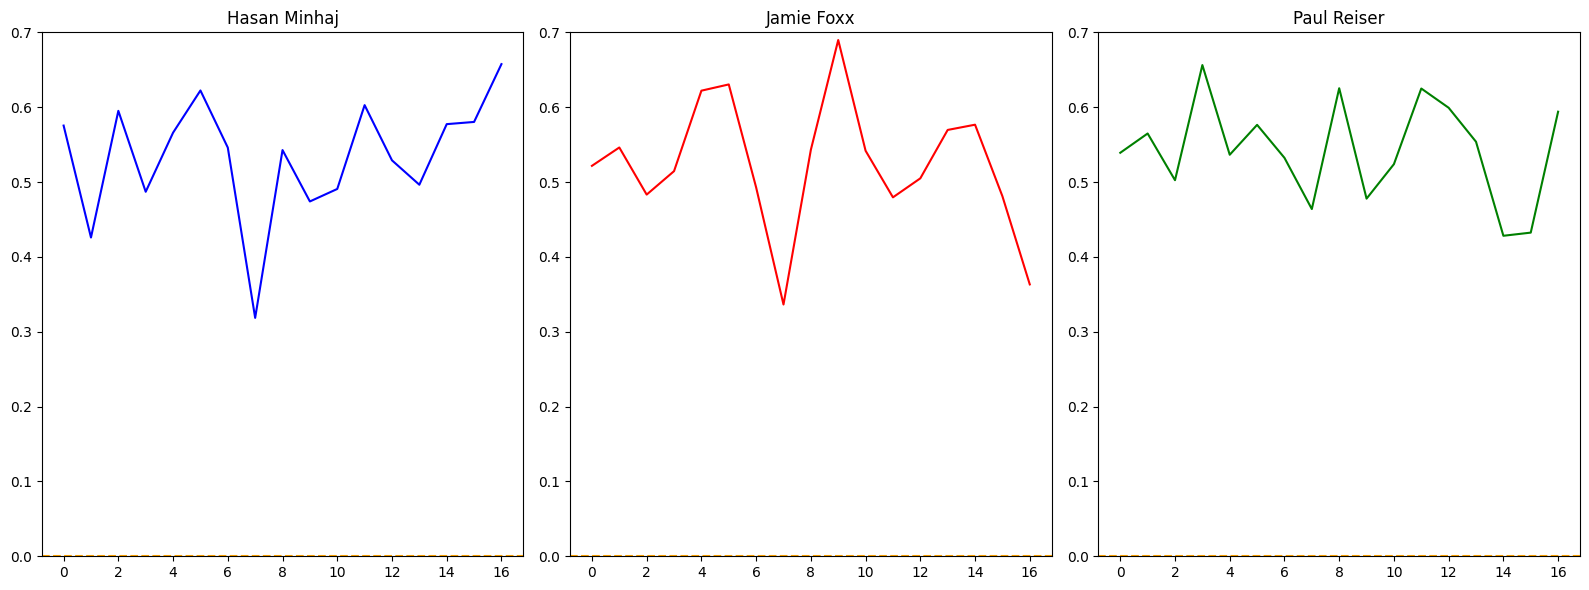

<ipython-input-66-1920d165fd60>:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(subjectivity_transcript[idx], color=colors[i], label=data['full_names'][idx])


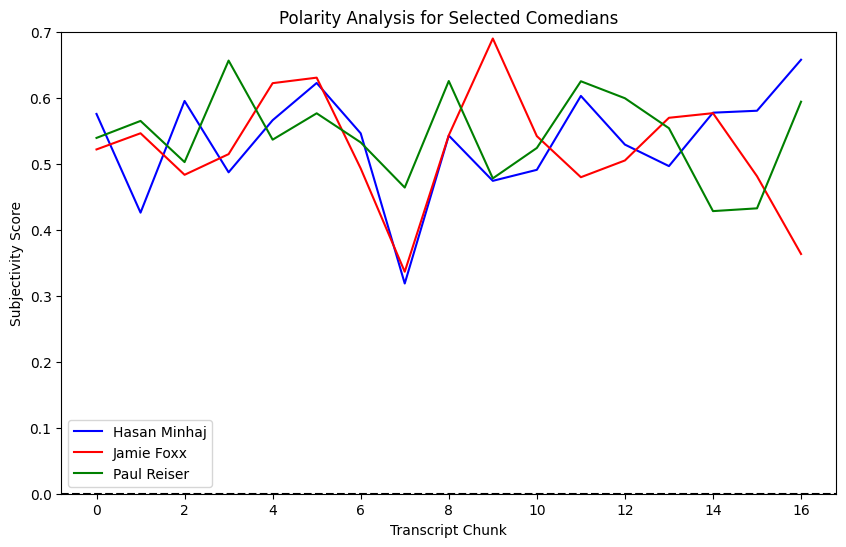

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Select the specific comedians (Python uses zero-based indexing, so 9th → index 8, 14th → index 13, 17th → index 16)
selected_indices = [7, 8, 13]
colors = ['blue', 'red', 'green']  # Different colors for each comedian

plt.figure(figsize=(16, 6))

# Plot individual graphs
for i, idx in enumerate(selected_indices):
    plt.subplot(1, 3, i + 1)
    plt.plot(subjectivity_transcript[idx], color=colors[i])
    plt.axhline(0, color='orange', linestyle='--')  # Baseline at y=0
    plt.title(data['full_names'][idx])
    plt.ylim(0, 0.7)

plt.tight_layout()
plt.show()

# Combined graph for all 3 comedians
plt.figure(figsize=(10, 6))
for i, idx in enumerate(selected_indices):
    plt.plot(subjectivity_transcript[idx], color=colors[i], label=data['full_names'][idx])

plt.axhline(0, color='black', linestyle='--')  # Baseline at y=0
plt.legend()
plt.title("Polarity Analysis for Selected Comedians")
plt.ylim(0, 0.7)
plt.xlabel("Transcript Chunk")
plt.ylabel("Subjectivity Score")
plt.show()


While all the comedians seemed to have a similar subjectivity looking at the 10 chunk data, here are some interesting insights-

- over a certain amount of time Jamie and Hasan tend to move towards a more factual storytelling rather than being subjective.
- Jamie tends to fluctuate over time indicating his adaptability to catch the audience's attention by varying his subjectivity.
- Other two tend to have a more stable graph indicating their alignment towards a more opiniated comedy and not based on much factual information.

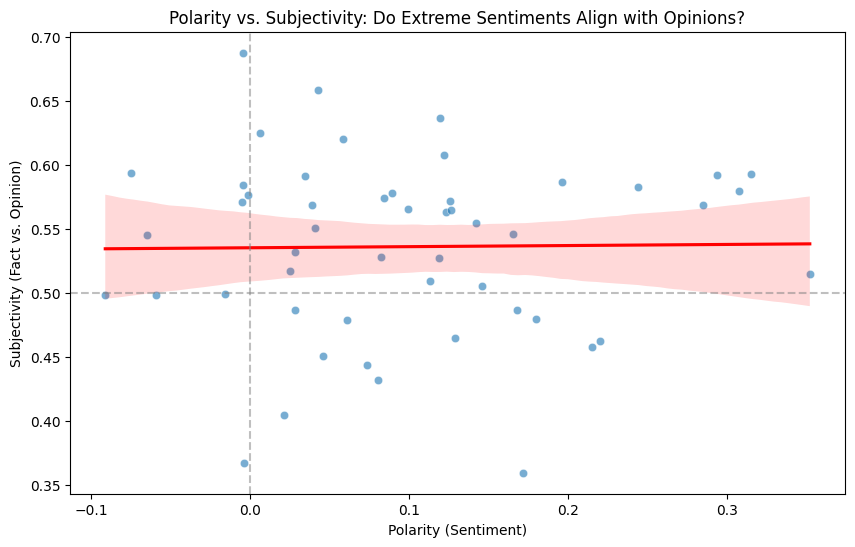

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Flatten polarity and subjectivity data for selected comedians (index 9, 14, 17)
polarity_values = np.concatenate([polarity_transcript[i] for i in [9, 14, 17]])
subjectivity_values = np.concatenate([subjectivity_transcript[i] for i in [9, 14, 17]])

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x=polarity_values, y=subjectivity_values, alpha=0.6)

# Trend line (regression)
sns.regplot(x=polarity_values, y=subjectivity_values, scatter=False, color='red')

plt.xlabel("Polarity (Sentiment)")
plt.ylabel("Subjectivity (Fact vs. Opinion)")
plt.title("Polarity vs. Subjectivity: Do Extreme Sentiments Align with Opinions?")
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)  # Neutral Subjectivity
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)    # Neutral Sentiment
plt.show()


- Weak correlation suggests that extreme sentiment does not necessarily mean the content is opinion-based.
- Comedians seem to maintain a balance between opinions and facts, regardless of how emotional their delivery is.